In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Datasets\EDA\Udemy_Courses.csv')

In [3]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
df.shape

(3682, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [6]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(3676, 11)

In [10]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.676000e+03,3676.000000,3676.000000,3676.000000
mean,6.765390e+05,3187.668934,156.205114,40.096572
std,3.434354e+05,9483.366476,935.682615,50.407036
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.079370e+05,111.000000,4.000000,15.000000
50%,6.881680e+05,912.000000,18.000000,25.000000
75%,9.616435e+05,2544.000000,67.000000,46.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [11]:
df.nunique()

course_id              3676
course_title           3667
is_paid                   2
price                    38
num_subscribers        2198
num_reviews             511
num_lectures            229
level                     4
content_duration        109
published_timestamp    3676
subject                   4
dtype: int64

In [12]:
# Checking the number of paid courses and free courses

df['is_paid'].value_counts()

True     3366
False     310
Name: is_paid, dtype: int64

<Axes: ylabel='is_paid'>

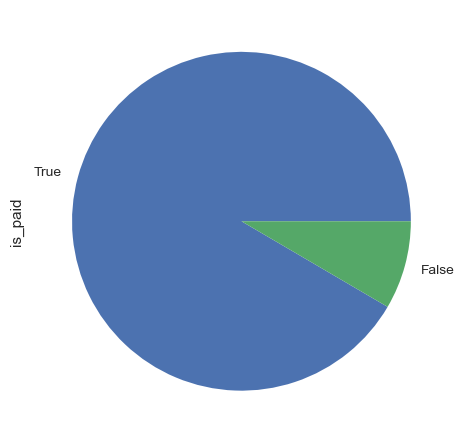

In [13]:
df['is_paid'].value_counts().plot(kind = 'pie')

In [14]:
# Checking the number of reviews by paid courses and free courses

df.groupby('is_paid')['num_reviews'].sum()

is_paid
False    132038
True     442172
Name: num_reviews, dtype: int64

<Axes: ylabel='num_reviews'>

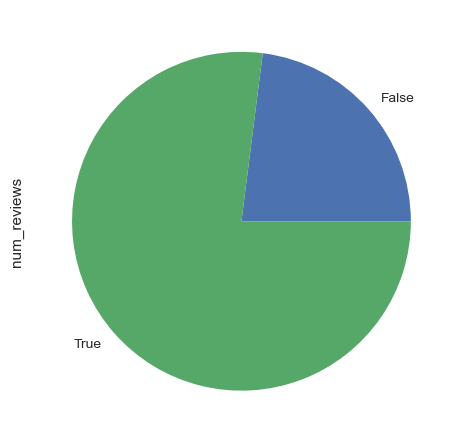

In [15]:
df.groupby('is_paid')['num_reviews'].sum().plot(kind = 'pie')

In [16]:
# Checking the number of subscribers for paid courses and free courses

df.groupby('is_paid')['num_subscribers'].sum()

is_paid
False    3575525
True     8142346
Name: num_subscribers, dtype: int64

<Axes: ylabel='num_subscribers'>

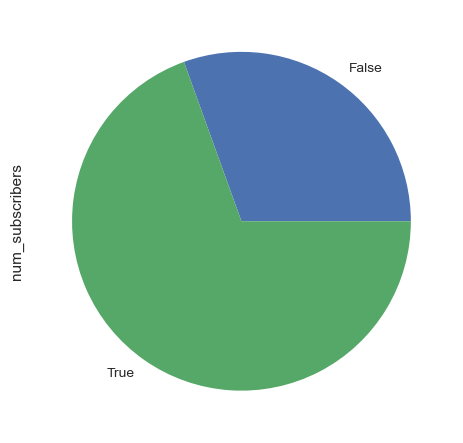

In [17]:
df.groupby('is_paid')['num_subscribers'].sum().plot(kind = 'pie')

In [18]:
# Count of various level of courses in paid courses and free courses 

df.groupby('is_paid')['level'].value_counts()

is_paid  level             
False    Beginner Level         158
         All Levels             122
         Intermediate Level      30
True     All Levels            1806
         Beginner Level        1111
         Intermediate Level     391
         Expert Level            58
Name: level, dtype: int64

In [19]:
# Count of various subjects in paid courses and free courses 

df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1066
         Musical Instruments     634
         Graphic Design          567
Name: subject, dtype: int64

In [20]:
# Checking the count of subjects

df['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

<Axes: >

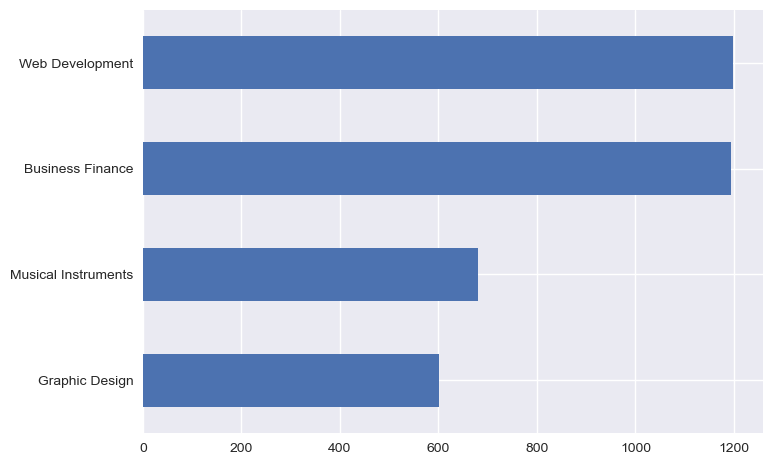

In [21]:
df['subject'].value_counts().sort_values().plot(kind = 'barh')

In [22]:
df['price'] = df['price'].str.replace('Free', '0').astype('int')

In [23]:
# Total Prices by Subject

df.groupby('subject')['price'].sum()

subject
Business Finance       81935
Graphic Design         34850
Musical Instruments    33700
Web Development        92365
Name: price, dtype: int32

<Axes: ylabel='subject'>

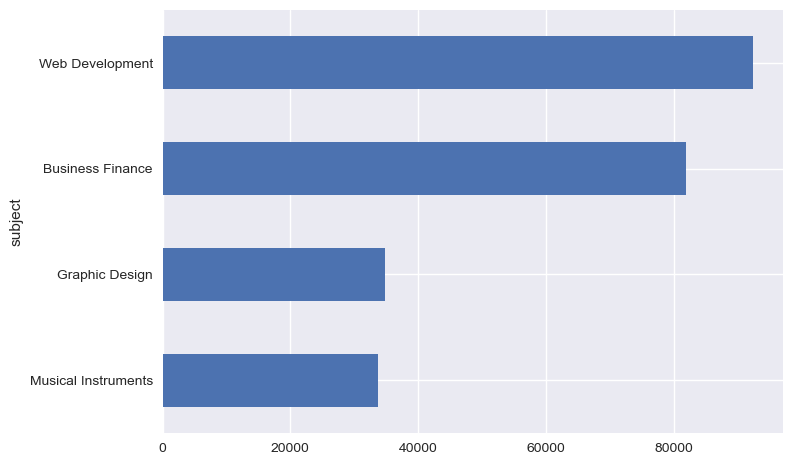

In [24]:
df.groupby('subject')['price'].sum().sort_values().plot(kind = 'barh')

In [25]:
# Average Prices by Subject

df.groupby('subject')['price'].mean()

subject
Business Finance       68.564854
Graphic Design         57.890365
Musical Instruments    49.558824
Web Development        77.035029
Name: price, dtype: float64

<Axes: ylabel='subject'>

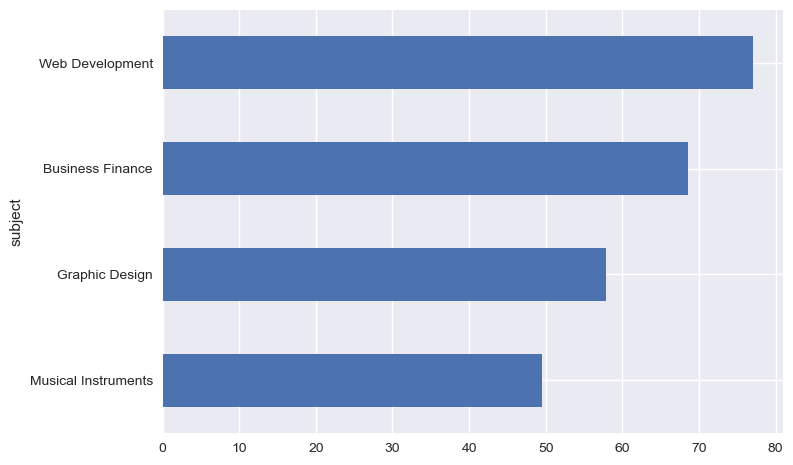

In [26]:
df.groupby('subject')['price'].mean().sort_values().plot(kind = 'barh')

In [27]:
# Checking how many times each course level appeard

df['level'].value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<Axes: >

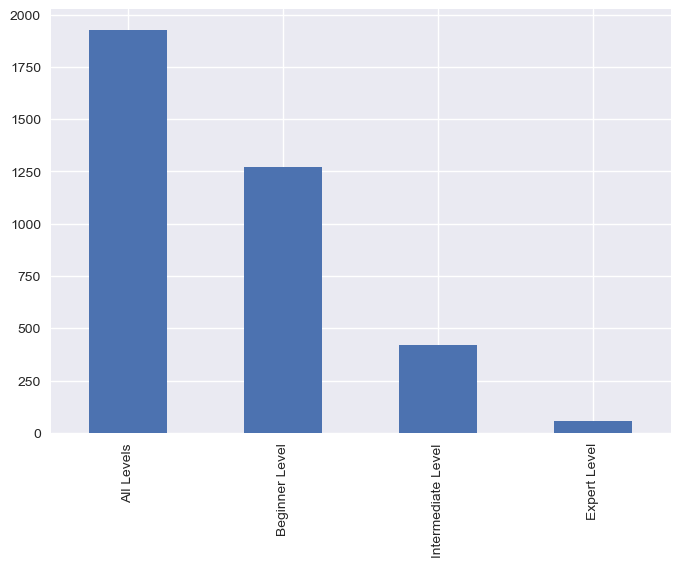

In [28]:
df['level'].value_counts().plot(kind = 'bar')

In [29]:
# Total Prices by various levels

df.groupby('level')['price'].sum()

level
All Levels            140790
Beginner Level         70705
Expert Level            5285
Intermediate Level     26070
Name: price, dtype: int32

<Axes: xlabel='level'>

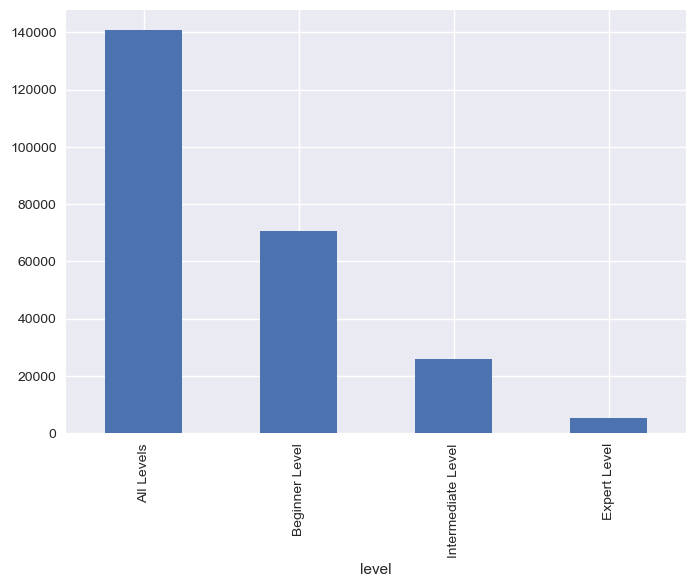

In [30]:
df.groupby('level')['price'].sum().sort_values(ascending = False).plot(kind = 'bar')

## Insights Generated

1. Most courses on Udemy turn out to be paid courses.
2. Most subscribers opt in for paid courses compared to free courses.
3. Paid Courses recieve more reviews compared to free courses.
4. Web Development is the subject most Udemy subscribers undertake.
5. Most Courses on Udemy applies to all level.